In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
appendicities  = pd.read_csv("appendicities-cleaned-data.csv").drop("Unnamed: 0", axis=1)
appendicities

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,MigratoryPain,LowerAbdominalPainRight,...,WBCCount,NeutrophilPerc,CRPEntry,Dysuria,Stool,Peritonitis,FreeFluids,DiagnosisByCriteria,TreatmentGroupBinar,AppendicitisComplications
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,no,yes,...,13.3,66.000000,76.0,no,normal,no,no,noAppendicitis,conservative,no
1,13.270363,20.449137,female,164.0,55.0,2,2,yes,no,yes,...,4.2,50.600000,2.0,no,obstipation,no,no,noAppendicitis,conservative,no
2,13.215606,23.597004,female,171.0,69.0,3,3,yes,yes,yes,...,6.7,52.700000,3.0,yes,diarrhea,no,no,noAppendicitis,conservative,no
3,13.106092,22.070312,female,160.0,56.5,3,2,no,no,yes,...,7.0,53.900000,0.0,no,normal,no,no,appendicitis,surgical,no
4,11.693361,19.269691,male,154.0,45.7,6,5,yes,no,yes,...,12.0,84.000000,47.0,no,diarrhea,no,no,appendicitis,conservative,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,5.418207,15.704719,male,112.0,19.7,6,5,no,yes,yes,...,8.8,80.000000,76.0,no,obstipation,no,yes,noAppendicitis,conservative,no
363,15.488022,20.581591,female,167.0,57.4,7,5,no,no,yes,...,12.2,85.400000,55.0,no,normal,no,yes,noAppendicitis,conservative,no
364,12.147844,22.292563,male,166.5,61.8,5,4,no,no,yes,...,10.3,70.873506,1.0,no,diarrhea,no,no,noAppendicitis,conservative,no
365,12.528405,29.316297,male,152.3,68.0,7,7,no,yes,yes,...,11.0,82.400000,5.0,no,normal,no,no,noAppendicitis,conservative,no


In [6]:
X = appendicities.drop(["DiagnosisByCriteria", "TreatmentGroupBinar", "AppendicitisComplications"], axis=1)
X.head()

,Age,BMI,Sex,Height,Weight,AlvaradoScore,PediatricAppendicitisScore,AppendixOnSono,MigratoryPain,LowerAbdominalPainRight,...,Nausea,AppetiteLoss,BodyTemp,WBCCount,NeutrophilPerc,CRPEntry,Dysuria,Stool,Peritonitis,FreeFluids
0,12.531143,16.494601,male,159.0,41.7,7,5,yes,no,yes,...,yes,no,38.7,13.3,66.0,76.0,no,normal,no,no
1,13.270363,20.449137,female,164.0,55.0,2,2,yes,no,yes,...,no,no,37.2,4.2,50.6,2.0,no,obstipation,no,no
2,13.215606,23.597004,female,171.0,69.0,3,3,yes,yes,yes,...,no,no,36.2,6.7,52.7,3.0,yes,diarrhea,no,no
3,13.106092,22.070312,female,160.0,56.5,3,2,no,no,yes,...,no,no,36.5,7.0,53.9,0.0,no,normal,no,no
4,11.693361,19.269691,male,154.0,45.7,6,5,yes,no,yes,...,no,no,38.7,12.0,84.0,47.0,no,diarrhea,no,no


In [7]:
y1 = appendicities["DiagnosisByCriteria"]
print(y1.head())
y2 = appendicities["TreatmentGroupBinar"]
print(y2.head())
y3 = appendicities["AppendicitisComplications"]
print(y3.head())

0    noAppendicitis
1    noAppendicitis
2    noAppendicitis
3      appendicitis
4      appendicitis
Name: DiagnosisByCriteria, dtype: object
0    conservative
1    conservative
2    conservative
3        surgical
4    conservative
Name: TreatmentGroupBinar, dtype: object
0    no
1    no
2    no
3    no
4    no
Name: AppendicitisComplications, dtype: object


### Making X Values Numeric

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Sex", "AlvaradoScore", "PediatricAppendicitisScore", "AppendixOnSono", "MigratoryPain", "LowerAbdominalPainRight", "ReboundTenderness", "CoughingPain", "PsoasSign", "Nausea", "AppetiteLoss", "Dysuria", "Stool", "Peritonitis", "FreeFluids"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[ 0.        ,  1.        ,  0.        , ..., 13.3       ,
        66.        , 76.        ],
       [ 1.        ,  0.        ,  1.        , ...,  4.2       ,
        50.6       ,  2.        ],
       [ 1.        ,  0.        ,  0.        , ...,  6.7       ,
        52.7       ,  3.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., 10.3       ,
        70.87350649,  1.        ],
       [ 0.        ,  1.        ,  0.        , ..., 11.        ,
        82.4       ,  5.        ],
       [ 1.        ,  0.        ,  0.        , ...,  9.8       ,
        54.5       , 55.        ]])

In [12]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,12.531143,16.494601,159.0,41.7,38.7,13.3,66.000000,76.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,13.270363,20.449137,164.0,55.0,37.2,4.2,50.600000,2.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,13.215606,23.597004,171.0,69.0,36.2,6.7,52.700000,3.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,13.106092,22.070312,160.0,56.5,36.5,7.0,53.900000,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,11.693361,19.269691,154.0,45.7,38.7,12.0,84.000000,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,5.418207,15.704719,112.0,19.7,39.0,8.8,80.000000,76.0
363,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,15.488022,20.581591,167.0,57.4,38.0,12.2,85.400000,55.0
364,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,12.147844,22.292563,166.5,61.8,38.4,10.3,70.873506,1.0
365,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,12.528405,29.316297,152.3,68.0,36.8,11.0,82.400000,5.0


### Splitting the Data into Train Sets and Test Sets

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(transformed_X, y1, y2, y3, test_size=0.2, random_state=2)

In [15]:
X_train.shape, X_test.shape, y1_train.shape, y1_test.shape, y2_train.shape, y2_test.shape, y3_train.shape, y3_test.shape

((293, 55), (74, 55), (293,), (74,), (293,), (74,), (293,), (74,))

### Fitting the Model

In [37]:
from sklearn.linear_model import LogisticRegression

DiagnosisByCriteria = LogisticRegression(max_iter=2000)
TreatmentGroupBinar = LogisticRegression(max_iter=2000)
AppendicitisComplications = LogisticRegression(max_iter=2000)

##### Diagnosis

In [34]:
DiagnosisByCriteria.fit(X_train, y1_train);

In [35]:
accuracy = DiagnosisByCriteria.score(X_test, y1_test)

In [36]:
accuracy

0.7837837837837838

#### Treatment

In [38]:
TreatmentGroupBinar.fit(X_train, y2_train);

In [39]:
accuracy = TreatmentGroupBinar.score(X_test, y2_test)

In [40]:
accuracy

0.8783783783783784

#### Complications

In [41]:
AppendicitisComplications.fit(X_train, y3_train);

In [42]:
accuracy = AppendicitisComplications.score(X_test, y3_test)

In [43]:
accuracy

0.8648648648648649

#### Other Evaluation Metrics

In [76]:
y1_preds = DiagnosisByCriteria.predict(X_test)
y2_preds = TreatmentGroupBinar.predict(X_test)
y3_preds = AppendicitisComplications.predict(X_test)


In [77]:
from sklearn.metrics import roc_auc_score,roc_curve, confusion_matrix, classification_report

In [78]:
# Predicted probabilities
# y1_pred_proba = log_reg.predict_proba(X_test)[:,1]
DiagnosisByCriteria.fit(X_train, y1_train)
y1_probs = DiagnosisByCriteria.predict_proba(X_test)

y1_probs[:10], len(y1_probs)


TreatmentGroupBinar.fit(X_train, y2_train)
y2_probs = TreatmentGroupBinar.predict_proba(X_test)

y2_probs[:10], len(y2_probs)



AppendicitisComplications.fit(X_train, y3_train)
y3_probs = AppendicitisComplications.predict_proba(X_test)

y3_probs[:10], len(y3_probs)


(array([[9.85637937e-01, 1.43620630e-02],
        [9.99066724e-01, 9.33276040e-04],
        [9.99135635e-01, 8.64365079e-04],
        [9.99392250e-01, 6.07749825e-04],
        [3.77156120e-02, 9.62284388e-01],
        [9.99164720e-01, 8.35280476e-04],
        [6.96010657e-01, 3.03989343e-01],
        [9.95696026e-01, 4.30397387e-03],
        [9.97738072e-01, 2.26192755e-03],
        [9.99802609e-01, 1.97391489e-04]]),
 74)

In [80]:
y1_probs_positive = y1_probs[:, 1]
y1_probs_positive[:10]

y2_probs_positive = y2_probs[:, 1]
y2_probs_positive[:10]


y3_probs_positive = y3_probs[:, 1]
y3_probs_positive[:10]

array([1.43620630e-02, 9.33276040e-04, 8.64365079e-04, 6.07749825e-04,
       9.62284388e-01, 8.35280476e-04, 3.03989343e-01, 4.30397387e-03,
       2.26192755e-03, 1.97391489e-04])

In [81]:
fpr1, tpr1, thresholds1 = roc_curve(y1_test, y1_probs_positive, pos_label="noAppendicitis")

fpr1

fpr2, tpr2, thresholds2 = roc_curve(y2_test, y2_probs_positive, pos_label="surgical")

fpr2

fpr3, tpr3, thresholds3 = roc_curve(y3_test, y3_probs_positive, pos_label="yes")

fpr3

array([0.        , 0.01515152, 0.01515152, 0.09090909, 0.09090909,
       0.1969697 , 0.1969697 , 0.48484848, 0.48484848, 0.65151515,
       0.65151515, 1.        ])

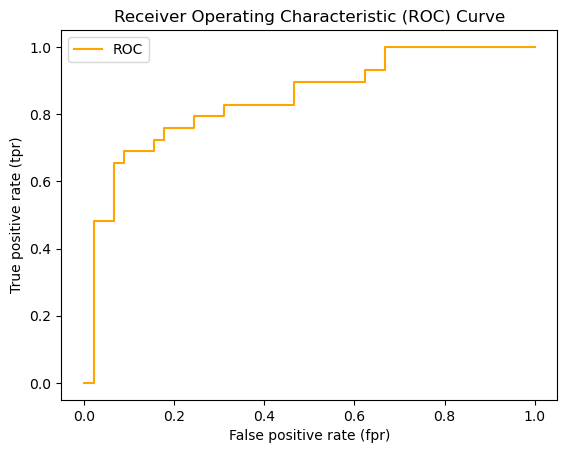

In [82]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr1, tpr1)

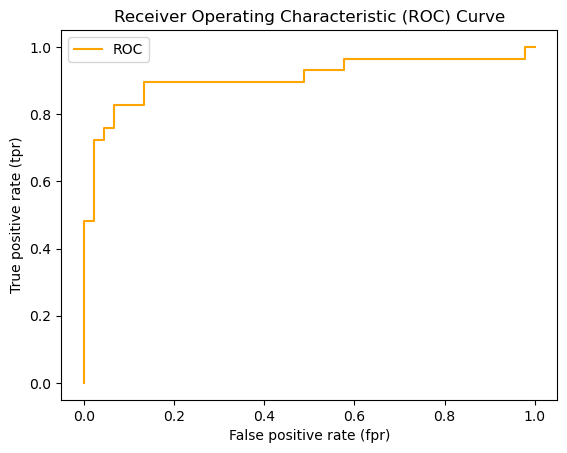

In [84]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr2, tpr2)

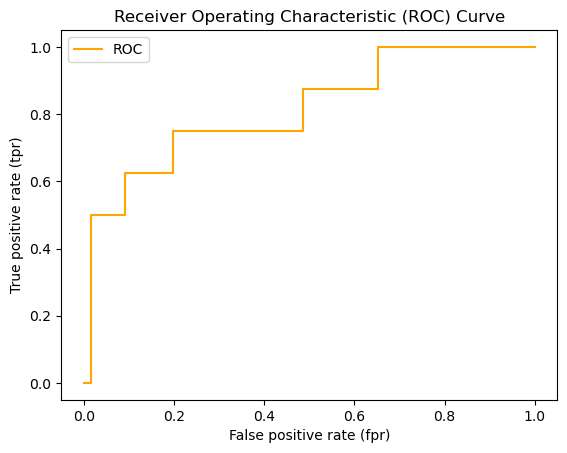

In [83]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    #plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr3, tpr3)

In [65]:
roc_auc_score(y1_test, y1_probs_positive)

0.8444444444444444

In [85]:
roc_auc_score(y2_test, y2_probs_positive)

0.9088122605363985

In [86]:
roc_auc_score(y3_test, y3_probs_positive)

0.8143939393939394

Confusion Matrix

In [73]:
y1_preds = DiagnosisByCriteria.predict(X_test)

confusion_matrix(y1_test, y1_preds)

array([[37,  8],
       [ 8, 21]], dtype=int64)

In [87]:
y2_preds = TreatmentGroupBinar.predict(X_test)

confusion_matrix(y2_test, y2_preds)

array([[44,  1],
       [ 8, 21]], dtype=int64)

In [88]:
y3_preds = AppendicitisComplications.predict(X_test)

confusion_matrix(y3_test, y3_preds)

array([[60,  6],
       [ 4,  4]], dtype=int64)

In [75]:
pd.crosstab(y1_test, 
            y1_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,appendicitis,noAppendicitis
Actual Label,,
appendicitis,37,8
noAppendicitis,8,21


In [89]:
pd.crosstab(y2_test, 
            y2_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,conservative,surgical
Actual Label,,
conservative,44,1
surgical,8,21


In [90]:
pd.crosstab(y3_test, 
            y3_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,no,yes
Actual Label,,
no,60,6
yes,4,4


##### Classification Report

In [71]:
print(classification_report(y1_test, y1_preds))

                precision    recall  f1-score   support

  appendicitis       0.82      0.82      0.82        45
noAppendicitis       0.72      0.72      0.72        29

      accuracy                           0.78        74
     macro avg       0.77      0.77      0.77        74
  weighted avg       0.78      0.78      0.78        74



In [92]:
print(classification_report(y2_test, y2_preds))

              precision    recall  f1-score   support

conservative       0.85      0.98      0.91        45
    surgical       0.95      0.72      0.82        29

    accuracy                           0.88        74
   macro avg       0.90      0.85      0.87        74
weighted avg       0.89      0.88      0.87        74



In [91]:
print(classification_report(y3_test, y3_preds))

              precision    recall  f1-score   support

          no       0.94      0.91      0.92        66
         yes       0.40      0.50      0.44         8

    accuracy                           0.86        74
   macro avg       0.67      0.70      0.68        74
weighted avg       0.88      0.86      0.87        74

